# Advanced Classification Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

We {**TEAM 18**}, confirm - by submitting this document - that the solutions in this notebook are a result of our own work and that we abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Twitter Sentiment Classification

Many companies are built around lessening one’s environmental impact or carbon footprint. They offer products and services that are environmentally friendly and sustainable, in line with their values and ideals. They would like to determine how people perceive climate change and whether or not they believe it is a real threat. This would add to their market research efforts in gauging how their product/service may be received.

With this context, EDSA is challenging you during the Classification Sprint with the task of creating a Machine Learning model that is able to classify whether or not a person believes in climate change, based on their novel tweet data.

Providing an accurate and robust solution to this task gives companies access to a broad base of consumer sentiment, spanning multiple demographic and geographic categories - thus increasing their insights and informing future marketing strategies.


### The evaluation metric
Mean F1-Score. The F1 score, commonly used in information retrieval, measures performance using using the statistics precision and recall.

Precision is the ratio of true positives to all predicted positives. Recall is the ratio of true positives to all actual positives.
The F1 metric weights recall and precision equally, and a good retrieval algorithm will maximize both precision and recall simultaneously. Thus, moderately good performance on both will be favored over extremely good performance on one and poor performance on the other.

### Submission Format
For every tweet in the dataset, submission files should contain two columns: tweetid and sentiment. sentiment should be a space-delimited list. Every tweetid will have a sentiment, as per your prediction. Refer to the Description page for more information about the valid classes in the sentiment column.

The file should contain a header and have the following format:

tweetid,sentiment
35326,1
15327,-1
54232,0 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [2]:
# Libraries for data loading, data manipulation and data visulisation
import nltk

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re

# set plot style
sns.set()

from nltk.corpus import stopwords
import string
from nltk.tokenize import word_tokenize, TreebankWordTokenizer
from nltk import SnowballStemmer, PorterStemmer, LancasterStemmer
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer
import urllib

nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('omw-1.4')

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Rumi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Rumi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Rumi\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [9]:
# Loading the train and test data
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test_with_no_labels.csv')
train_df.head()


,sentiment,message,tweetid
0,-1,RT @darreljorstad: Funny as hell! Canada deman...,897853122080407553
1,-1,All the biggest lies about climate change and ...,925046776553529344
2,-1,The Coming Revelation Of The $q$Global Warming...,696354236850786305
3,-1,RT @DineshDSouza: Let's see if the world ends ...,846806509732483072
4,-1,RT @SteveSGoddard: Obama has no control over t...,628085266293653504


In [10]:
test_df.head()

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928


In [11]:
train_df['sentiment'].value_counts()

 1    16073
 2     6493
 0     5400
-1     2793
Name: sentiment, dtype: int64

In [13]:
train_df_base = train_df.copy()
test_df_base = test_df.copy()

In [16]:
print(train_df_base.shape)
print(test_df_base.shape)

(30759, 3)
(10546, 2)


In [17]:
train_df_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30759 entries, 0 to 30758
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  30759 non-null  int64 
 1   message    30759 non-null  object
 2   tweetid    30759 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 721.0+ KB


In [18]:
train_df_base.isnull().sum()

sentiment    0
message      0
tweetid      0
dtype: int64

In [19]:
test_df_base.isnull().sum()

message    0
tweetid    0
dtype: int64

In [20]:
train_df_base.describe()

,sentiment,tweetid
count,30759.000000,3.075900e+04
mean,0.853929,8.364330e+17
std,0.853551,8.519986e+16
min,-1.000000,5.926334e+17
25%,0.000000,7.970301e+17
50%,1.000000,8.401516e+17
75%,1.000000,8.996975e+17
max,2.000000,9.666876e+17


In [21]:
train_df_base.skew()

sentiment   -0.592675
tweetid     -0.569575
dtype: float64

In [23]:
train_df_base.kurtosis()

sentiment   -0.116253
tweetid      0.163476
dtype: float64

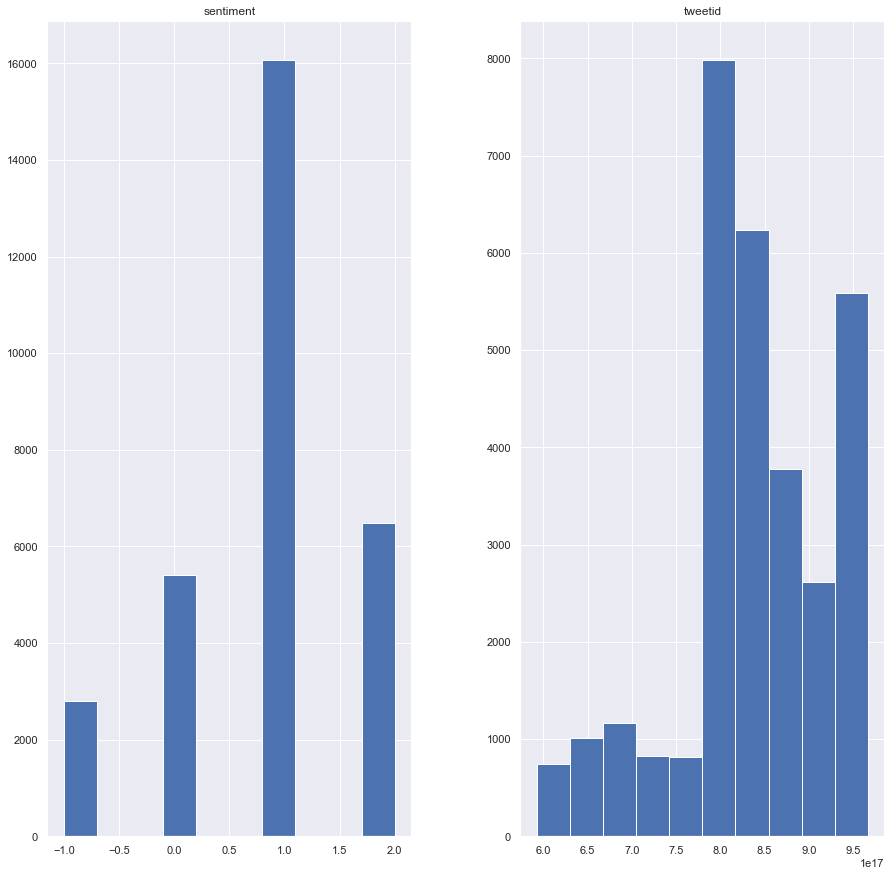

In [24]:
features = ['sentiment', 'tweetid'] # create a list of all numerical features
train_df_base[features].hist(figsize=(15,15));

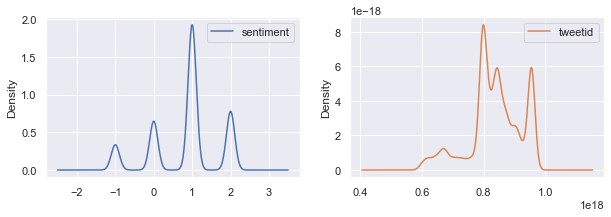

In [25]:
train_df_base[features].plot(kind='density', subplots=True, layout=(3, 2), sharex=False, figsize=(10, 10));

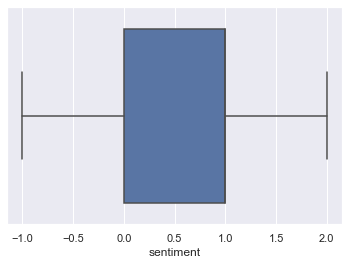

In [26]:
sns.boxplot(x='sentiment', data=train_df_base);

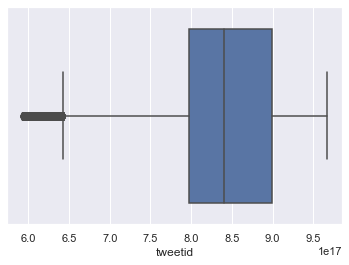

In [27]:
sns.boxplot(x='tweetid', data=train_df_base);

In [28]:
train_df_base.corr()

,sentiment,tweetid
sentiment,1.000000,-0.013503
tweetid,-0.013503,1.000000


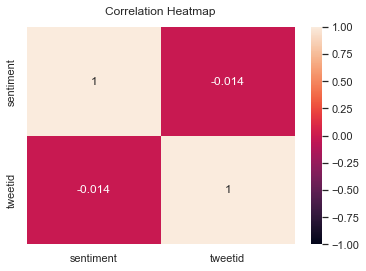

In [29]:
heatmap = sns.heatmap(train_df_base.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [30]:
# labels
y = train_df_base['sentiment']

# features
X = train_df_base.drop('sentiment', axis=1)

In [31]:
# Transforming the Features
X_transformed = pd.get_dummies(X, drop_first=True)

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=50)

### Training base model

We need the LogisticRegression module from sklearn.linear_model.

In [34]:
from sklearn.linear_model import LogisticRegression

In [37]:
lr = LogisticRegression()

In [38]:
lr.fit(X_train, y_train)

LogisticRegression()

In [39]:
lr.intercept_[0]

-1.1713753333729037e-36

In [42]:
coeff_df = pd.DataFrame(lr.coef_.T, X_transformed.columns)
coeff_df

,0,1,2,3
tweetid,-9.604984e-19,-1.657909e-19,1.113286e-18,1.300287e-20
message_ Trump taps climate change skeptic Scott Pruitt to Head EPA\n\nhttps://t.co/q98URnVtwC via @ShipsandPorts,-2.861371e-40,-4.634871e-40,-1.229370e-39,1.978994e-39
message_ yea your nudes are nice but what are your views on climate change' i just choked why is this me 😂,-2.779878e-40,2.048259e-39,-1.250196e-39,-5.200757e-40
"message_# Signsyouregettingold you have memories of the ice age ,before global warming",-2.424651e-40,2.080881e-39,-1.346617e-39,-4.917987e-40
message_# Supreme Court Rules on Climate Change https://t.co/9qN2FiDDV2,-3.346560e-40,-5.006441e-40,-1.113920e-39,1.949220e-39
...,...,...,...,...
"message_😞 @LeoDiCaprio, help. https://t.co/AAaMafSIG0",-3.184846e-40,-4.889616e-40,1.353973e-39,-5.465268e-40
message_😠 SIGN to restore &amp; maintain accurate science-based info on climate change to the White House website https://t.co/OAcWWDzjeK,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
message_😠😠😠😠😠😠 Climate change is pure BULLSHIT. https://t.co/8LNRKEynN1,2.190745e-39,-4.856802e-40,-1.161139e-39,-5.439258e-40
message_😨 @jenrios78 https://t.co/NGF8emit0F,-3.331082e-40,-4.995544e-40,-1.117396e-39,1.950058e-39


In [43]:
pred_lr = lr.predict(X_test)

In [44]:
from sklearn.metrics import classification_report

In [46]:
print('Classification Report')
print(classification_report(y_test, pred_lr, target_names=['-1: Anti', '0: Neutral', '1: Pro', '2: News']))

Classification Report
              precision    recall  f1-score   support

    -1: Anti       0.00      0.00      0.00       527
  0: Neutral       0.00      0.00      0.00      1040
      1: Pro       0.52      1.00      0.69      3219
     2: News       0.00      0.00      0.00      1366

    accuracy                           0.52      6152
   macro avg       0.13      0.25      0.17      6152
weighted avg       0.27      0.52      0.36      6152



In [48]:
sentiment = pd.DataFrame(pred_lr, columns = ['sentiment'])


In [49]:
sentiment.head()

,sentiment
0,1
1,1
2,1
3,1
4,1


In [51]:
tweetid = pd.DataFrame({'tweetid': test_df_base['tweetid']}) 

In [52]:
base_model_submission = tweetid.join(sentiment)

In [53]:
base_model_submission.to_csv('base_model_submission.csv', index = False)

In [54]:
base_model_submission = pd.read_csv('base_model_submission.csv')
base_model_submission.head()

,tweetid,sentiment
0,169760,1.0
1,35326,1.0
2,224985,1.0
3,476263,1.0
4,872928,1.0


<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


In [ ]:
# Look at a sample from the top of the dataset
train_data.head()

In [ ]:
# We'll print off a list of all the features which are present in this dataset.
feature_labels = list(train_data.feature.unique())
print(feature_labels)

In [ ]:
train_data['feature'].value_counts().plot(kind = 'bar')
plt.show()

## Text Cleaning

### Removing Noise

In text analytics, removing noise (i.e. unneccesary information) is a key part of getting the data into a usable format. Some techniques are standard, but your own data will require some creative thinking on your part.

For the train dataset we will be doing the following steps:

- removing the web-urls
- making everything lower case
- removing punctuation

#### Remove punctuation

- First we make all the text lower case to remove some noise from capitalisation.

### Tokenisation

A tokeniser divides text into a sequence of tokens, which roughly correspond to "words" (see the Stanford Tokeniser). We will use tokenisers to clean up the data, making it ready for analysis.

### Stemming

Stemming is the process of transforming to the root word. It uses an algorithm that removes common word-endings from English words, such as “ly,” “es,” “ed,” and “s.”

For example, assuming for an analysis you may want to consider “carefully,” “cared,” “cares,” “caringly” as “care” instead of separate words. There are three widely used stemming algorithms, namely:

    - Porter
    - Lancaster
    - Snowball
Out of these three, we will be using the SnowballStemmer.

### Lemmatization

A very similar operation to stemming is called lemmatization. Lemmatizing is the process of grouping words of similar meaning together. So, your root stem, meaning the word you end up with, is not something you can just look up in a dictionary, but you can look up a lemma.

### Stop Words

Stop words are words which do not contain important significance to be used in Search Queries. Usually these words are filtered out from search queries because they return a vast amount of unnecessary information. nltk has a corpus of stopwords. Let's print out the stopwords for English.

## Text feature extraction

### Bag of words

Text feature extraction is the process of transforming what is essentially a list of words into a feature set that is usable by a classifier. The NLTK classifiers expect dict style feature sets, so we must therefore transform our text into a dict. The Bag of Words model is the simplest method; it constructs a word presence feature set from all the words in the text, indicating the number of times each word has appeared.

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---